<center>
 <h1> INF395 - Introducción a las Redes Neuronales Artificiales</h1>
    <h2> Tarea 1</h2>
</center>
<b>Integrantes:</b>
* Camilo Saldías González - 201223512-K - camilo.saldias.12@sansano.usm.cl
* Felipe Vásquez Astudillo - 201473504-9 - felipe.vasquez.14@sansano.usm.cl

# Tabla de contenido
* [1.-Predicción del precio de una Casa](#p1)
* [2.-*Deep Networks*](#p2)
* [3.-Convolutional Neural Network (CNN) en CIFAR](#p3)
* [4.-Aplicación de una red neuronal en Localización](#p4)

<div id='p1' />
## 1. Predicción del precio de una Casa

In [0]:
#Importamos todo lo que utilizaremos en la pregunta
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from timeit import default_timer as timer

In [74]:
#Por si usamos plotly, importamos las cosas
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Parte a)

In [6]:
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806,0.930830,0.069170
std,8.601545,23.310593,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104,0.253994,0.253994
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000,1.000000,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000,1.000000,0.000000
75%,3.677082,12.000000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000,1.000000,0.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,1.000000


In [0]:
#Normalizamos los datos para los sets de entrenamiento y de prueba

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').values.reshape([-1,1])

In [0]:
scaler = StandardScaler().fit(df_test)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_test = df_test.pop('MEDV').values.reshape([-1,1])

Parte b)

In [0]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform'))
model.add(Activation('linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

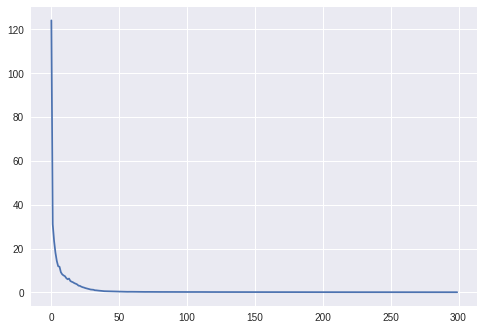

In [10]:
plt.plot(range(0, 300), hist.history["loss"], label="Keras")
plt.show()

Parte c)

In [0]:
model2 = Sequential()
model2.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
model2.add(Activation('relu'))
model2.add(Dense(1, kernel_initializer='uniform'))
model2.add(Activation('linear'))
sgd2 = SGD(lr=0.01)
model2.compile(optimizer=sgd2,loss='mean_squared_error')
hist2 = model2.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))

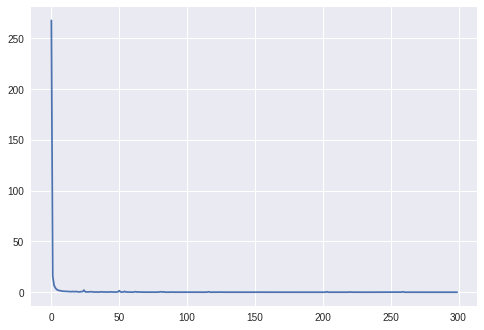

In [12]:
plt.plot(range(0, 300), hist2.history["loss"], label="Keras")
plt.show()

Parte d)

In [0]:
n_lr = 5
lear_rate = np.logspace(start=-5, stop=-1, num=n_lr, base=10)
values = {}
for lr in lear_rate:
  print("lr="+str(lr))
  model = Sequential()
  model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
  model.add(Activation('sigmoid'))
  model.add(Dense(1, kernel_initializer='uniform'))
  model.add(Activation('linear'))
  sgd = SGD(lr=lr) #Con lr más de 0.025, hell breaks loose.
  model.compile(optimizer=sgd,loss='mean_squared_error')
  hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
      verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
  values[lr] = hist.history["loss"]

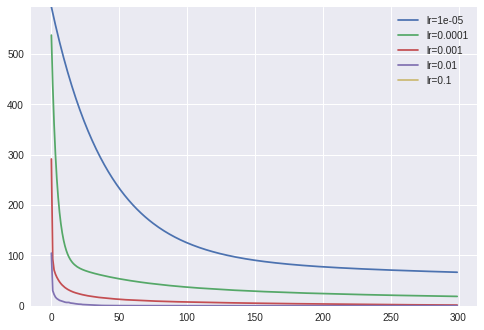

In [46]:
legend = []
for lr, loss in list(values.items()):
  plt.plot(range(0, 300), loss)
  legend.append('lr='+str(lr))

filtered_max = list(map(max, list(values.values())))
filtered_max = list(filter(lambda x: x!= np.inf, filtered_max))
plt.ylim(ymax=max(filtered_max), ymin=0)
plt.legend(legend, loc='upper right')
plt.show()

In [0]:
n_lr = 5
lear_rate = np.logspace(start=-5, stop=-1, num=n_lr, base=10)
values_relu = {}
for lr in lear_rate:
  model = Sequential()
  model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
  model.add(Activation('relu'))
  model.add(Dense(1, kernel_initializer='uniform'))
  model.add(Activation('linear'))
  sgd = SGD(lr=lr) #Con lr más de 0.025, hell breaks loose.
  model.compile(optimizer=sgd,loss='mean_squared_error')
  hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
      verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
  values_relu[lr] = hist.history["loss"]

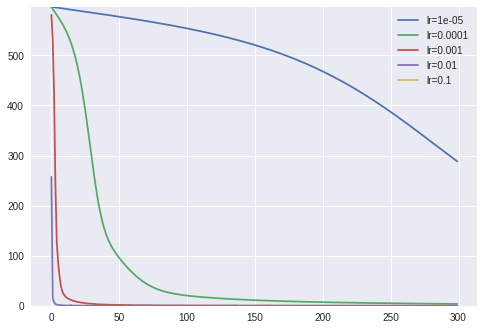

In [50]:
legend = []
for lr, loss in list(values_relu.items()):
  plt.plot(range(0, 300), loss)
  legend.append('lr='+str(lr))

filtered_max = list(map(max, list(values_relu.values())))
filtered_max = list(filter(lambda x: x!= np.inf, filtered_max))
plt.ylim(ymax=max(filtered_max), ymin=0)
plt.legend(legend, loc='upper right')
plt.show()

Parte e)

In [0]:
n_dr = 7
decay_rate = np.logspace(start=-7, stop=-1, num=n_dr, base=10)
values = {}
for dr in decay_rate:
  model = Sequential()
  model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
  model.add(Activation('sigmoid'))
  model.add(Dense(1, kernel_initializer='uniform'))
  model.add(Activation('linear'))
  sgd = SGD(lr=0.01, decay=dr)
  model.compile(optimizer=sgd,loss='mean_squared_error')
  hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
      verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
  values[dr] = hist.history["loss"]

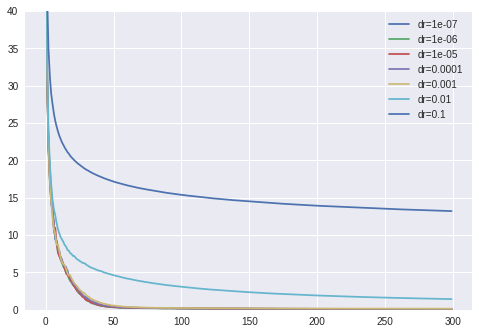

In [78]:
legend = []
for lr, loss in list(values.items()):
  plt.plot(range(0, 300), loss)
  legend.append('dr='+str(lr))

filtered_max = list(map(max, list(values.values())))
filtered_max = list(filter(lambda x: x!= np.inf, filtered_max))
plt.ylim(ymax=40, ymin=0) #ymax era max(filtered_max)+10
plt.legend(legend, loc='upper right')
plt.show()

In [0]:
n_dr = 7
decay_rate = np.logspace(start=-7, stop=-1, num=n_dr, base=10)
values_relu = {}
for dr in decay_rate:
  model = Sequential()
  model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
  model.add(Activation('relu'))
  model.add(Dense(1, kernel_initializer='uniform'))
  model.add(Activation('linear'))
  sgd = SGD(lr=0.01, decay=dr)
  model.compile(optimizer=sgd,loss='mean_squared_error')
  hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
      verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
  values_relu[dr] = hist.history["loss"]

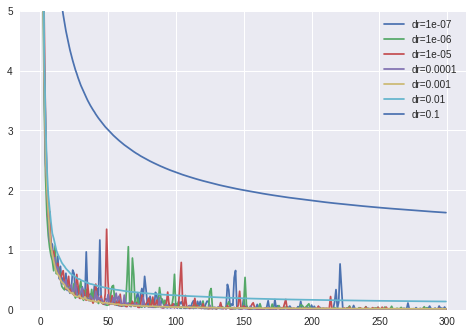

In [85]:
legend = []
for lr, loss in list(values_relu.items()):
  plt.plot(range(0, 300), loss)
  legend.append('dr='+str(lr))

filtered_max = list(map(max, list(values.values())))
filtered_max = list(filter(lambda x: x!= np.inf, filtered_max))
plt.ylim(ymax=5, ymin=0) #ymax era max(filtered_max)+10
plt.legend(legend, loc='upper right')
plt.show()

Parte f)

In [126]:
n_batches = 6
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
values = {}
times = {}
for size in batch_sizes:
  size = int(size)
  print("Size="+str(size))
  model = Sequential()
  model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
  model.add(Activation('sigmoid'))
  model.add(Dense(1, kernel_initializer='uniform'))
  model.add(Activation('linear'))
  sgd = SGD(lr=0.01)
  model.compile(optimizer=sgd,loss='mean_squared_error')
  start = timer()
  hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
      batch_size = size, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
  end = timer()
  values[size] = hist.history["loss"]
  times[size] = end - start

Size=1
Size=77
Size=152
Size=228
Size=303
Size=379


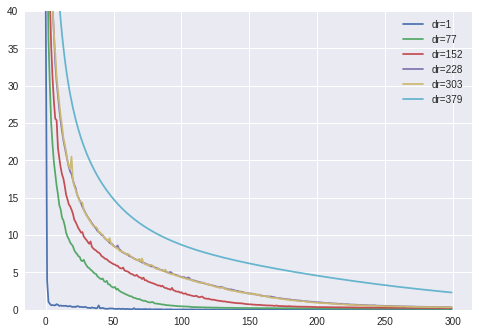

In [127]:
legend = []
for lr, loss in list(values.items()):
  plt.plot(range(0, 300), loss)
  legend.append('dr='+str(lr))

filtered_max = list(map(max, list(values.values())))
filtered_max = list(filter(lambda x: x!= np.inf, filtered_max))
plt.ylim(ymax=40, ymin=0) #ymax era max(filtered_max)+10
plt.legend(legend, loc='upper right')
plt.show()

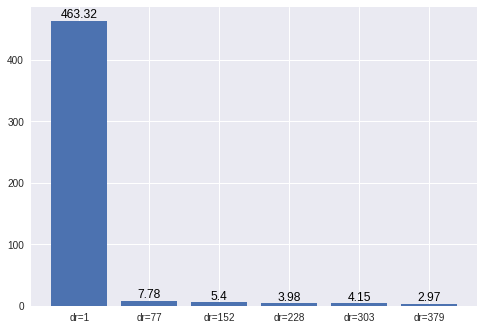

In [128]:
x = np.arange(6)
fig, ax = plt.subplots()
plt.bar(x, times.values())
plt.xticks(x, list(map(lambda x: "dr="+str(x), times.keys())))
for i, v in enumerate(times.values()):
    ax.text(i, v + 5, str(round(v, 2)), color='black', ha='center')
plt.show()

In [129]:
n_batches = 6
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
values_relu = {}
times_relu = {}
for size in batch_sizes:
  size = int(size)
  print("Size="+str(size))
  model = Sequential()
  model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
  model.add(Activation('relu'))
  model.add(Dense(1, kernel_initializer='uniform'))
  model.add(Activation('linear'))
  sgd = SGD(lr=0.01)
  model.compile(optimizer=sgd,loss='mean_squared_error')
  start = timer()
  hist = model.fit(X_train_scaled.as_matrix(), y_train, epochs=300,
      batch_size = size, verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test))
  end = timer()
  values_relu[size] = hist.history["loss"]
  times_relu[size] = end - start

Size=1
Size=77
Size=152
Size=228
Size=303
Size=379


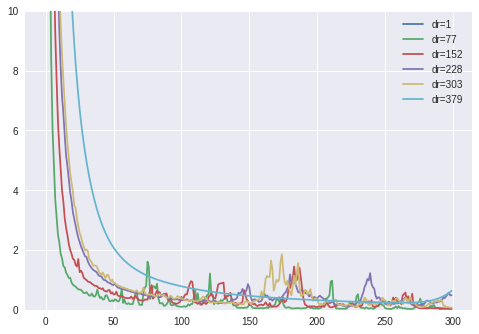

In [132]:
legend = []
for lr, loss in list(values_relu.items()):
  plt.plot(range(0, 300), loss)
  legend.append('dr='+str(lr))

filtered_max = list(map(max, list(values_relu.values())))
filtered_max = list(filter(lambda x: x!= np.inf, filtered_max))
plt.ylim(ymax=10, ymin=0) #ymax era max(filtered_max)+10
plt.legend(legend, loc='upper right')
plt.show()

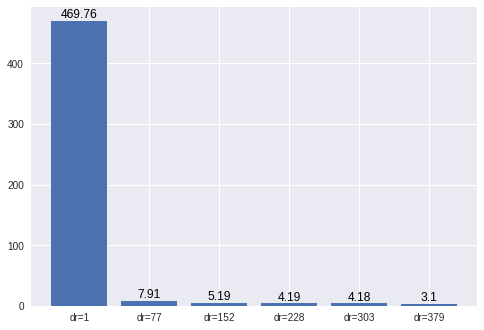

In [133]:
x = np.arange(6)
fig, ax = plt.subplots()
plt.bar(x, times_relu.values())
plt.xticks(x, list(map(lambda x: "dr="+str(x), times_relu.keys())))
for i, v in enumerate(times_relu.values()):
    ax.text(i, v + 5, str(round(v, 2)), color='black', ha='center')
plt.show()

Parte g)